In [1]:
import pandas as pd
import numpy as np
import bluebelt as blue

In [2]:
nrows = 100
ncols = 6

np.random.seed(27)
series = pd.Series(np.random.weibull(7,nrows) * 100, index=pd.date_range(start='1-1-2020', periods=nrows), name='process A')
frame = pd.DataFrame(np.random.normal(loc=100, scale=20, size=ncols*nrows).reshape(nrows, ncols), index=pd.date_range(start='1-1-2020', periods=nrows), columns=[f'process {col}' for col in range(1, ncols+1)])

In [3]:
series.blue.performance.summary()

Summary(mean=95.9, std=15.5, min=54.2, q1=82.9, median=98.1, q3=107.9, max=125.1)

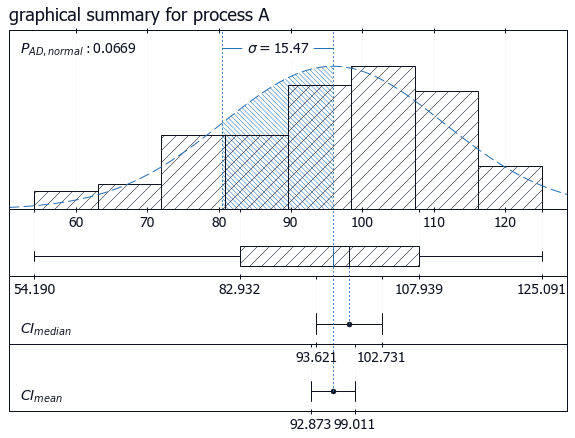

In [4]:
series.blue.performance.summary().plot()

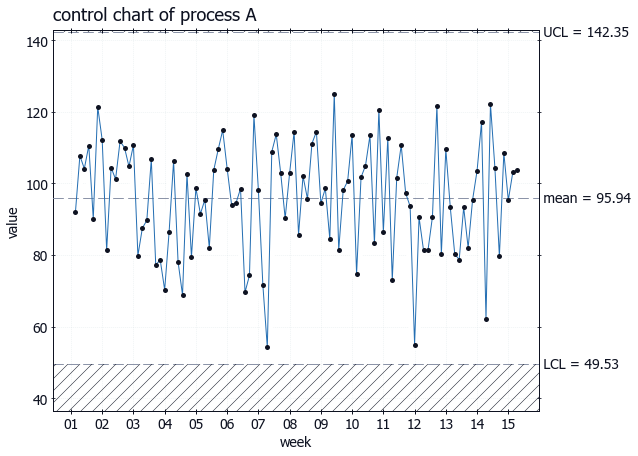

In [5]:
series.blue.performance.control_chart().plot()

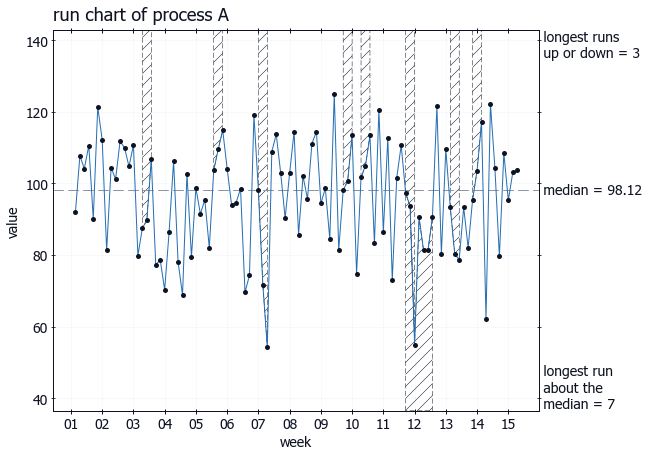

In [6]:
series.blue.performance.run_chart().plot()

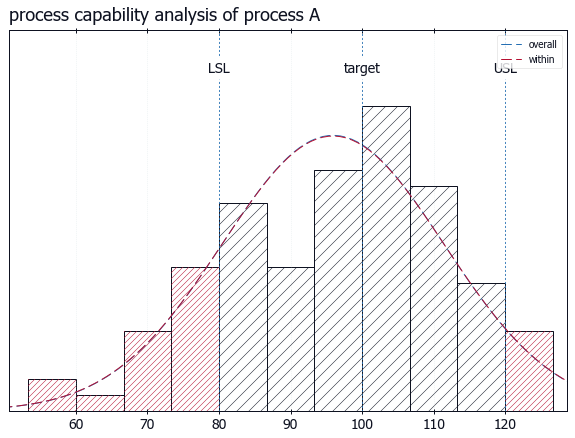

In [7]:
series.blue.performance.capability(lsl=80, usl=120, target=100).plot()

In [8]:
series.blue.performance.capability(lsl=80, usl=120, target=100).result

Process Data                       Potential Capability               Overall Capability                 
target         100                 Cp             0.43                Pp             0.43                
LSL            80.00000            Cpl            0.34                Ppl            0.34                
USL            120.00000           Cpu            0.52                Ppu            0.52                
mean           95.94196            Cpk            0.34                Ppk            0.34                
n              100                 CCpk           0.43                Cpm            0.42                
std within     15.50821            
std overall    15.46910            

Observed Performance               Expected Performance (Within)      Expected Performance (Overall)     
PPM < LSL      170000              PPM < LSL      151982              PPM < LSL      151372              
PPM > USL      50000               PPM > USL      151982              PPM > USL

In [22]:
# break the series
breaks = series.shape[0] // 10
loc = list(np.arange(0+breaks, series.shape[0], breaks))
series.iloc[loc] = np.nan

# break the frame
breaks = frame.shape[0] // 5
loc = list(np.arange(0+breaks, frame.shape[0], breaks))
for x in range(frame.shape[1]):
    frame.iloc[loc,x] = np.nan

In [23]:
series.blue.performance.capability(lsl=80, usl=120, target=100).result

Process Data                       Potential Capability               Overall Capability                 
target         100                 Cp             0.43                Pp             0.43                
LSL            80.00000            Cpl            0.34                Ppl            0.34                
USL            120.00000           Cpu            0.52                Ppu            0.52                
mean           95.82779            Cpk            0.34                Ppk            0.34                
n              100                 CCpk           0.43                Cpm            0.44                
std within     15.52568            
std overall    15.48261            

Observed Performance               Expected Performance (Within)      Expected Performance (Overall)     
PPM < LSL      160000              PPM < LSL      153993              PPM < LSL      153321              
PPM > USL      50000               PPM > USL      153993              PPM > USL

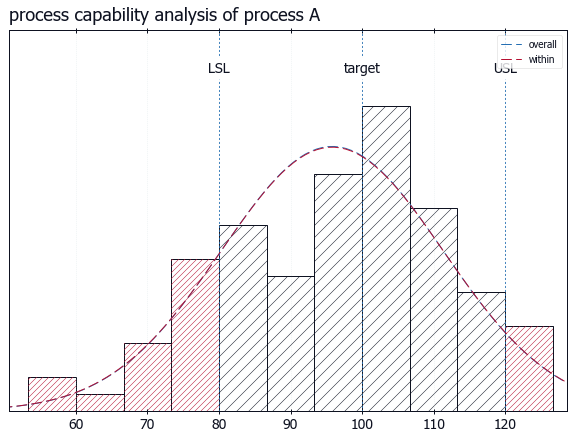

In [24]:
series.blue.performance.capability(lsl=80, usl=120, target=100).plot()